# ML Lab 2 Tasks
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/02_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### Note! Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/00_cheatsheet.ipynb)

# Task 2.1
_Get data from url_housing and visualize_
- Preview data, get statistics (.head(), .inf(), .describe())
- Print data histogram


_Type your code below_


=== HEAD ===
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeInde

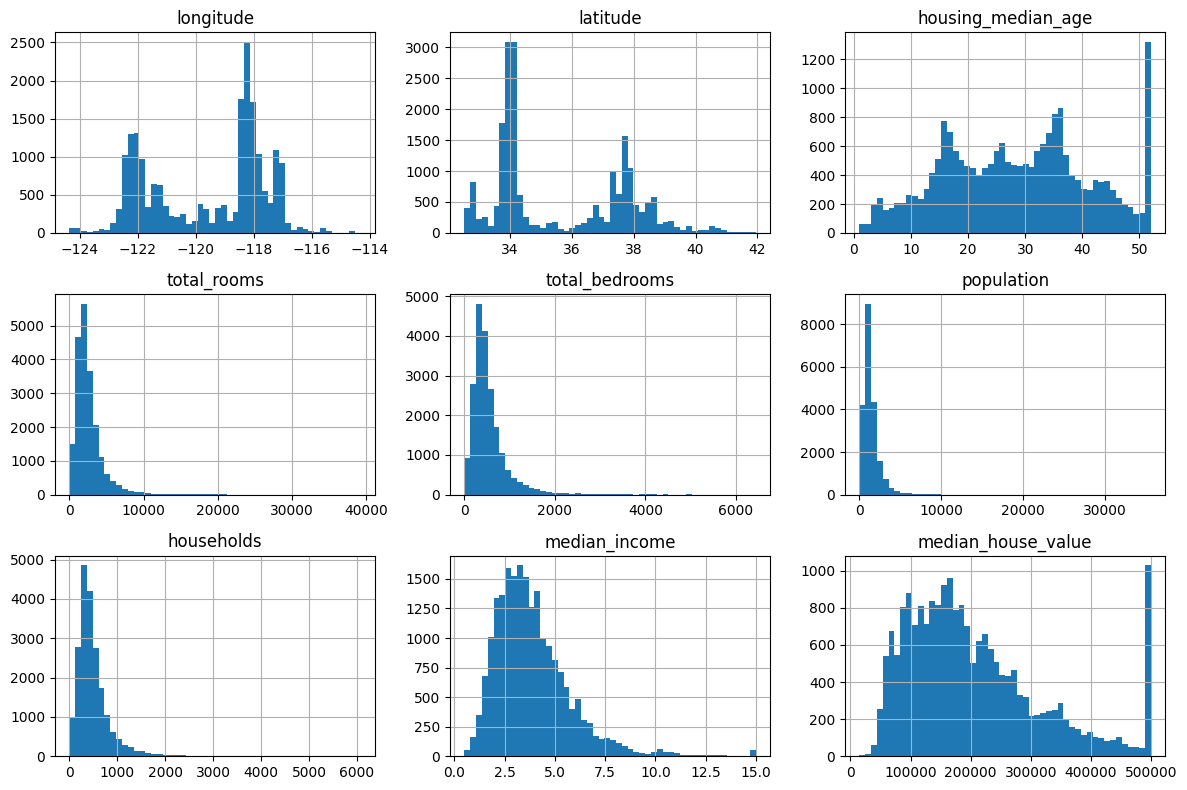

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

URL_HOUSING = (
    "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
)

def load_housing_data(url: str) -> pd.DataFrame:
    """Load housing data from remote CSV."""
    df = pd.read_csv(url)
    return df


housing_df = load_housing_data(URL_HOUSING)

print("\n=== HEAD ===")
print(housing_df.head())

print("\n=== INFO ===")
print(housing_df.info())

print("\n=== DESCRIBE ===")
print(housing_df.describe())

plt.style.use("default")
housing_df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()


# Task 2.2
_Create train / test split (80/20)_
- Create random split
- Create stratifed split on income class (5 strata)


_Type your code below_

In [2]:
from typing import Tuple
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [3]:
def random_train_test_split(
    df: pd.DataFrame, test_size: float = 0.2, random_state: int = 42
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Return random 80/20 split."""
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    return train_df, test_df

In [4]:
def stratified_income_split(
    df: pd.DataFrame, n_strata: int = 5, test_size: float = 0.2, random_state: int = 42
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Create income categories and perform stratified split.
    """
    df = df.copy()
    df["income_cat"] = pd.cut(
        df["median_income"],
        bins=n_strata,
        labels=[str(i) for i in range(n_strata)],
        include_lowest=True,
    )

    splitter = StratifiedShuffleSplit(
        n_splits=1, test_size=test_size, random_state=random_state
    )

    for train_idx, test_idx in splitter.split(df, df["income_cat"]):
        strat_train = df.loc[train_idx].drop(columns=["income_cat"])
        strat_test = df.loc[test_idx].drop(columns=["income_cat"])

    return strat_train, strat_test

In [5]:
train_random, test_random = random_train_test_split(housing_df)

train_strat, test_strat = stratified_income_split(housing_df)

print("Random split:", train_random.shape, test_random.shape)
print("Stratified split:", train_strat.shape, test_strat.shape)

Random split: (16512, 10) (4128, 10)
Stratified split: (16512, 10) (4128, 10)


# Task 2.3
_Visualize_
- Create plot using geographical data (lang, lat). Add alpha. Add color for median_house_value. Add size for population. OPTIONAL Add basemap (e.g. plotly.express)
- Create correlation matrix
- Plot correlation for median_income and median_house_value

_Explore_
 - Make train dataframe  copy
 - Create 3 new features:
    - rooms_per_household  = total_rooms / households,
    - bedrooms_per_room = total_bedrooms / total_rooms
    - population_per_household = population / households
- Check correlation of new features

_Type your code below_

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

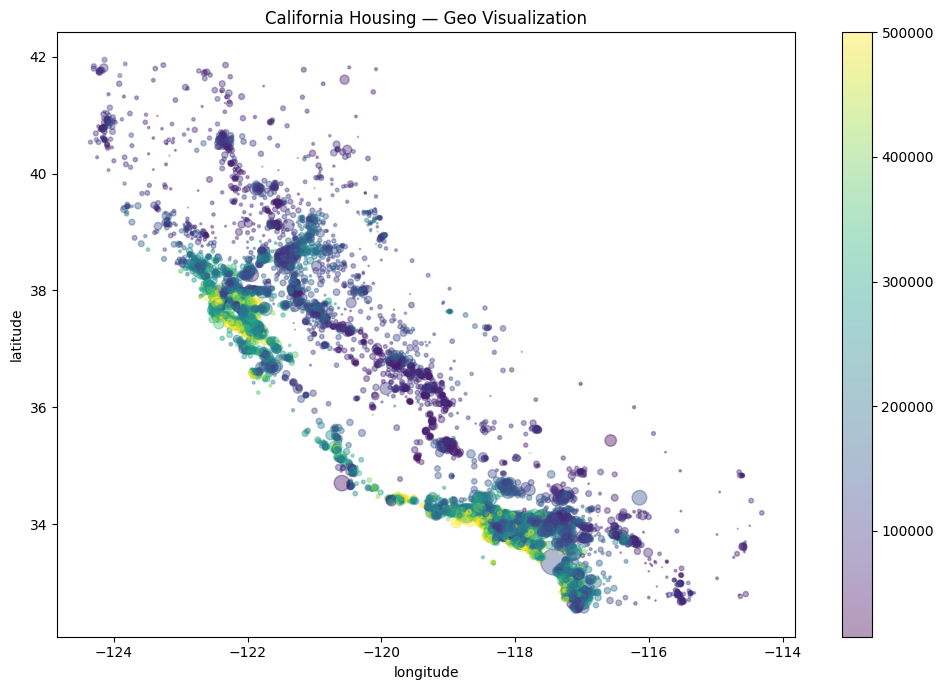

In [7]:
def plot_geodata(df: pd.DataFrame) -> None:
    """
    Scatter plot: geo location + color by house value + size by population.
    """
    df.plot(
        kind="scatter",
        x="longitude",
        y="latitude",
        alpha=0.4,
        s=df["population"] / 100,               # size
        c=df["median_house_value"],             # color
        cmap="viridis",
        figsize=(10, 7),
        colorbar=True,
    )
    plt.title("California Housing — Geo Visualization")
    plt.tight_layout()
    plt.show()


plot_geodata(train_strat)

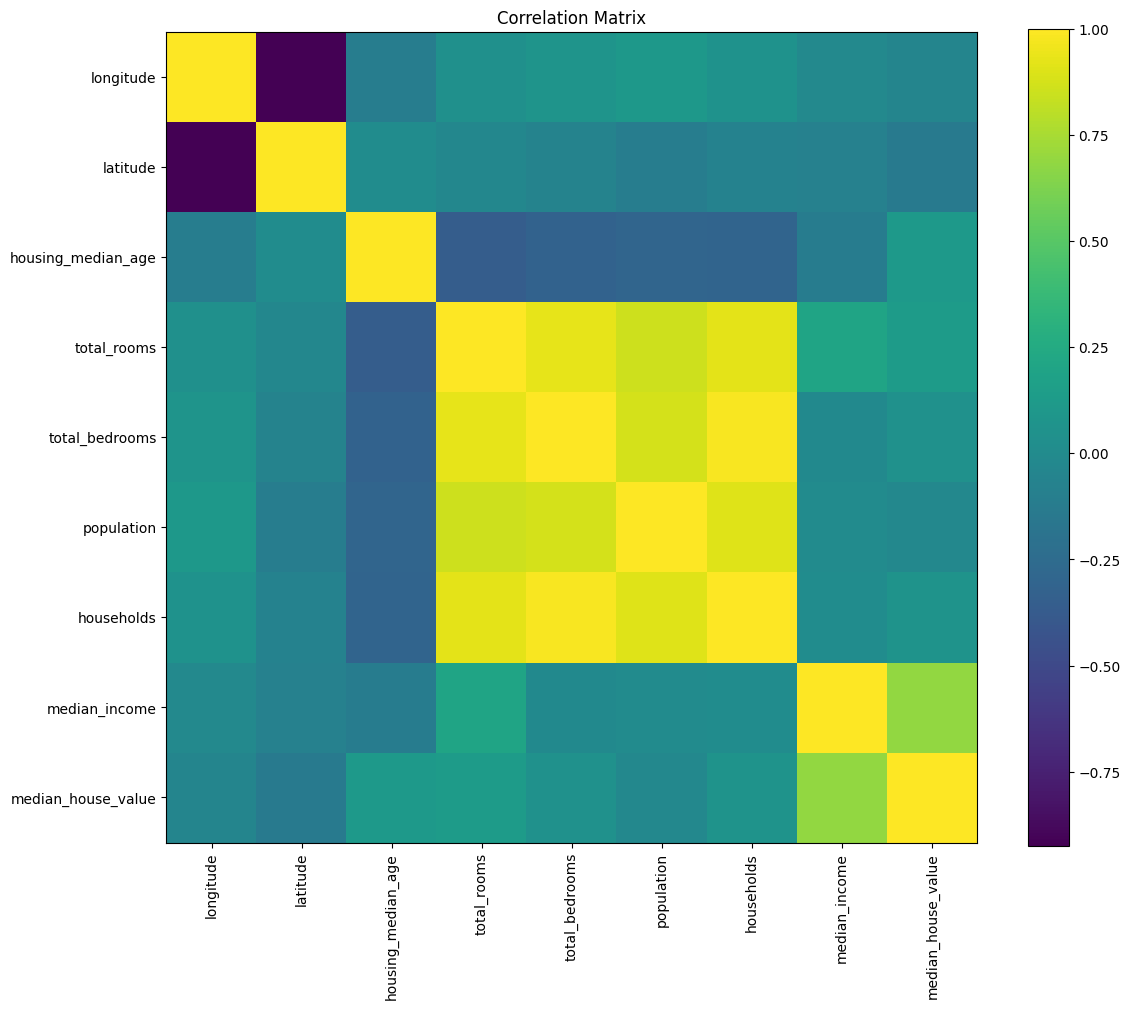


=== Correlation Matrix ===
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924187           -0.108863     0.044904   
latitude            -0.924187  1.000000            0.010416    -0.036383   
housing_median_age  -0.108863  0.010416            1.000000    -0.360218   
total_rooms          0.044904 -0.036383           -0.360218     1.000000   
total_bedrooms       0.068773 -0.066557           -0.318687     0.929946   
population           0.099205 -0.108289           -0.294261     0.853813   
households           0.054237 -0.070761           -0.300637     0.917526   
median_income       -0.015157 -0.079202           -0.119165     0.196059   
median_house_value  -0.048989 -0.142358            0.111343     0.132382   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068773    0.099205    0.054237      -0.015157   
latitude                 -0.066557   -0.108289   -0.07076

In [8]:
def plot_corr_matrix(df: pd.DataFrame) -> None:
    """Plot correlation matrix for numerical columns."""
    corr = df.corr(numeric_only=True)

    plt.figure(figsize=(12, 10))
    plt.imshow(corr, cmap="viridis", interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

    print("\n=== Correlation Matrix ===")
    print(corr)


plot_corr_matrix(train_strat)


=== Correlation (median_income ↔ median_house_value) ===
                    median_income  median_house_value
median_income            1.000000            0.684937
median_house_value       0.684937            1.000000


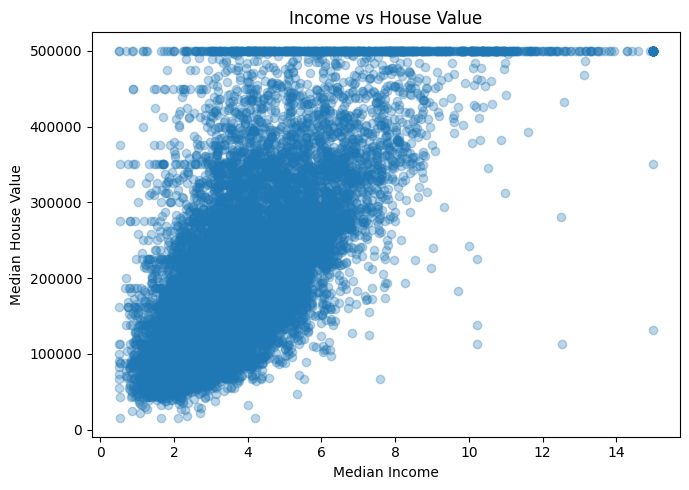

In [9]:
corr_pair = train_strat[["median_income", "median_house_value"]].corr()
print("\n=== Correlation (median_income ↔ median_house_value) ===")
print(corr_pair)

plt.figure(figsize=(7, 5))
plt.scatter(
    train_strat["median_income"],
    train_strat["median_house_value"],
    alpha=0.3,
)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income vs House Value")
plt.tight_layout()
plt.show()

In [10]:
housing_exp = train_strat.copy()

housing_exp["rooms_per_household"] = (
    housing_exp["total_rooms"] / housing_exp["households"]
)
housing_exp["bedrooms_per_room"] = (
    housing_exp["total_bedrooms"] / housing_exp["total_rooms"]
)
housing_exp["population_per_household"] = (
    housing_exp["population"] / housing_exp["households"]
)


=== Correlation with median_house_value (including new features) ===
median_house_value          1.000000
median_income               0.684937
rooms_per_household         0.146619
total_rooms                 0.132382
housing_median_age          0.111343
households                  0.065330
total_bedrooms              0.049391
population_per_household   -0.022462
population                 -0.026795
longitude                  -0.048989
latitude                   -0.142358
bedrooms_per_room          -0.252923
Name: median_house_value, dtype: float64


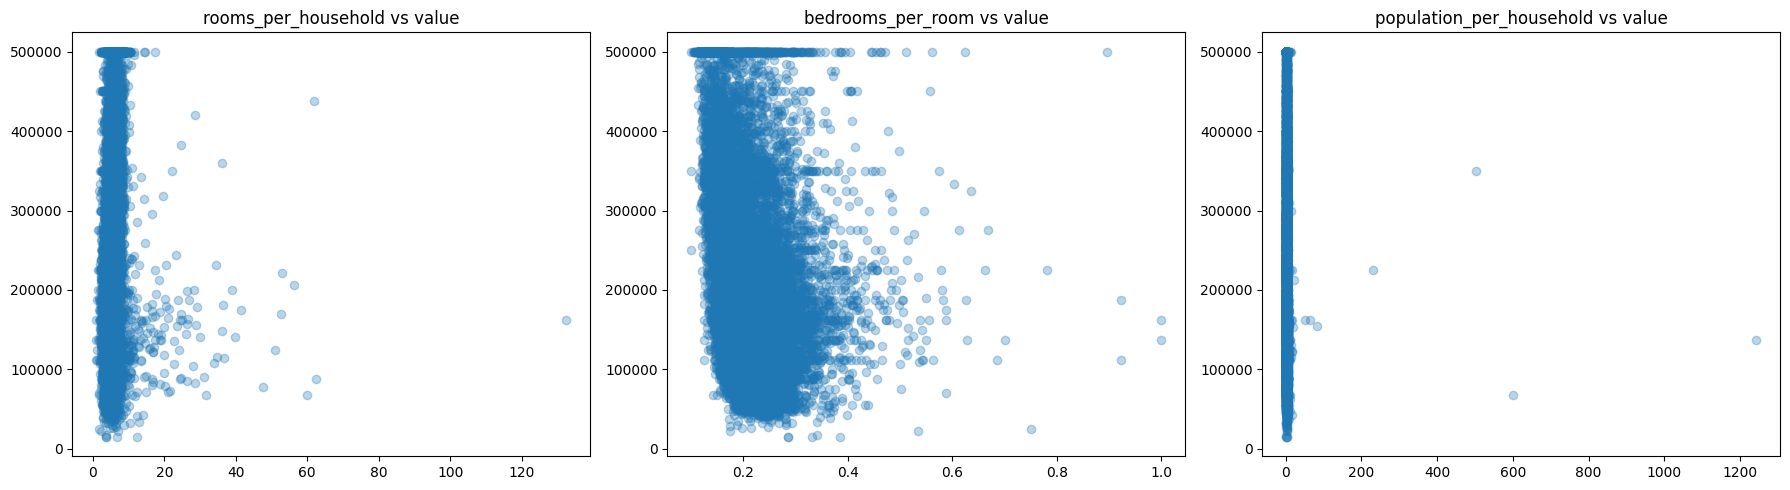

In [11]:
corr_new = housing_exp.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

print("\n=== Correlation with median_house_value (including new features) ===")
print(corr_new)

fig, ax = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

ax[0].scatter(
    housing_exp["rooms_per_household"],
    housing_exp["median_house_value"],
    alpha=0.3,
)
ax[0].set_title("rooms_per_household vs value")

ax[1].scatter(
    housing_exp["bedrooms_per_room"],
    housing_exp["median_house_value"],
    alpha=0.3,
)
ax[1].set_title("bedrooms_per_room vs value")

ax[2].scatter(
    housing_exp["population_per_household"],
    housing_exp["median_house_value"],
    alpha=0.3,
)
ax[2].set_title("population_per_household vs value")

plt.show()

# Task 2.4
_Prepare_
- Make train dataframe copy, drop label
- Make train dataframe copy with label only

_Clean_
 - Fill missing total_bedrooms with median value ( whe using inputer watch out for categorical features)
 - Convert categorical features into one-hot features


_Type your code below_

In [12]:
from typing import Tuple
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [13]:
def prepare_xy(df: pd.DataFrame, label_col: str = "median_house_value") -> Tuple[pd.DataFrame, pd.Series]:
    """
    Prepare X (features) and y (label).
    """
    df_copy = df.copy()
    X = df_copy.drop(columns=[label_col])
    y = df_copy[label_col].copy()
    return X, y


X_train, y_train = prepare_xy(train_strat)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (16512, 9)
y_train shape: (16512,)


In [14]:
numerical_features = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numerical_features)
print("Categorical features:", categorical_features)

numeric_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numerical_features),
        ("cat", categorical_pipeline, categorical_features),
    ]
)

Numeric features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical features: ['ocean_proximity']


In [15]:
X_train_prepared = preprocessor.fit_transform(X_train)

print("Prepared training data shape:", X_train_prepared.shape)

Prepared training data shape: (16512, 13)


# Task 2.5
_Clean_
- Remove outliers with Isolation forest
- Standardize numerical variables
- Try fixing distribution od population variable using:
    - log function
    - percentiles
- Add rbf measure for value 35 of housing_median_age


_Type your code below_

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [17]:
df = train_strat.copy()

In [18]:
def remove_outliers_iforest(
    df: pd.DataFrame,
    contamination: float = 0.02,
    random_state: int = 42,
) -> pd.DataFrame:
    """
    Removes outliers using IsolationForest on numeric features only.
    """
    df_clean = df.copy()

    numeric_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns

    iso = IsolationForest(
        contamination=contamination,
        random_state=random_state,
        n_estimators=200,
    )

    preds = iso.fit_predict(df_clean[numeric_cols])

    mask = preds == 1
    df_filtered = df_clean.loc[mask].reset_index(drop=True)

    print(f"IsolationForest removed {df_clean.shape[0] - df_filtered.shape[0]} rows")

    return df_filtered

df = remove_outliers_iforest(df)

IsolationForest removed 331 rows


In [19]:
df["population_log"] = np.log1p(df["population"])

lower_p = np.percentile(df["population"], 1)
upper_p = np.percentile(df["population"], 99)
df["population_clipped"] = df["population"].clip(lower=lower_p, upper=upper_p)

In [20]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
df["population_yeojohnson"] = pt.fit_transform(df[["population"]])

In [21]:
def standardize_numeric(df: pd.DataFrame) -> pd.DataFrame:
    """
    Standardizes only numeric columns, keeps categories untouched.
    """
    df_std = df.copy()

    num_cols = df_std.select_dtypes(include=["float64", "int64"]).columns

    scaler = StandardScaler()
    df_std[num_cols] = scaler.fit_transform(df_std[num_cols])

    return df_std


df = standardize_numeric(df)

In [22]:
def rbf_feature(series: pd.Series, center: float, sigma: float = 5) -> pd.Series:
    """
    Radial Basis Function (Gaussian Kernel):
    exp( - (x - c)^2 / (2 * sigma^2) )
    """
    return np.exp(-((series - center) ** 2) / (2 * sigma**2))


df["age_rbf_35"] = rbf_feature(
    series=df["housing_median_age"],
    center=35,
    sigma=5
)

print("Final dataframe shape:", df.shape)
print(df.head())

Final dataframe shape: (16181, 14)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -0.211837  1.535636           -0.555991     0.424471        0.348773   
1  -2.122028  2.166842           -0.074548     0.245050        0.332634   
2   0.571192 -0.638516            0.727858    -0.849348       -0.635716   
3  -1.239250  0.965214            0.888339    -0.417679       -0.645399   
4  -0.865192  1.082103            1.369782    -0.401790       -0.442046   

   population  households  median_income  median_house_value ocean_proximity  \
0   -0.347830   -0.149571      -0.454945           -0.698185          INLAND   
1   -0.289858   -0.103687      -0.936307           -1.150870       <1H OCEAN   
2    0.031405   -0.629592      -0.712424           -0.602608       <1H OCEAN   
3   -0.708949   -0.696654       0.778417            0.420928        NEAR BAY   
4   -0.432373   -0.333108      -0.966479           -1.028358          INLAND   

   population_log  population_cli

# Task 2.6
_Generate custom transformations_
- add log transformer for population
- add rbf measure for value 35 of housing_median_age
- add 10 KMeans clusters
- add rooms_per_house, people_per_house, bedrooms_ratio (last one optional set by hyperparamter)

_Generate custom pipeline to combine transformations__
- pipeline for preprocessing the numerical attributes
    - median inputer
    - attributs adder
    - StandardScaler
- full pipeline witn numerical pipeline the numerical attributes and OneHotEncoder for categorical attributes

_Type your code below_

In [23]:
from typing import Optional
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [36]:
def ensure_dataframe(X, columns=None):
    """Convert numpy array → pandas DataFrame with provided column names."""
    if isinstance(X, pd.DataFrame):
        return X.copy()
    return pd.DataFrame(X, columns=columns).copy()

class AttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_ratio=True, feature_names=None):
        self.add_bedrooms_ratio = add_bedrooms_ratio
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = ensure_dataframe(X, self.feature_names)

        X["rooms_per_household"] = X["total_rooms"] / X["households"]
        X["people_per_household"] = X["population"] / X["households"]

        if self.add_bedrooms_ratio:
            X["bedrooms_ratio"] = X["total_bedrooms"] / X["total_rooms"]

        return X


class PopulationLogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names=None):
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = ensure_dataframe(X, self.feature_names)
        X["population_log"] = np.log1p(X["population"])
        return X


class AgeRBFTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, center=35.0, sigma=5.0, feature_names=None):
        self.center = center
        self.sigma = sigma
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = ensure_dataframe(X, self.feature_names)
        X["age_rbf_35"] = np.exp(-((X["housing_median_age"] - self.center) ** 2) /
                                 (2 * self.sigma**2))
        return X


class KMeansClusterAdder(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, random_state=42, feature_names=None):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.feature_names = feature_names

    def fit(self, X, y=None):
        X = ensure_dataframe(X, self.feature_names)
        self.clusterer = KMeans(
            n_clusters=self.n_clusters,
            random_state=self.random_state,
            n_init="auto"
        ).fit(X)
        return self

    def transform(self, X):
        X = ensure_dataframe(X, self.feature_names)
        X["cluster"] = self.clusterer.predict(X)
        return X

In [37]:
def get_feature_groups(df):
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    return numeric_cols, categorical_cols


def create_numerical_pipeline(numeric_cols):
    return Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("attr_adder", AttributeAdder(feature_names=numeric_cols)),
        ("pop_log", PopulationLogTransformer(feature_names=numeric_cols)),
        ("age_rbf", AgeRBFTransformer(feature_names=numeric_cols)),
        ("clusters", KMeansClusterAdder(feature_names=numeric_cols)),
        ("scaler", StandardScaler())
    ])


def create_full_preprocessing_pipeline(df):
    numeric_cols, categorical_cols = get_feature_groups(df)

    numeric_pipeline = create_numerical_pipeline(numeric_cols)

    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ])

    return full_pipeline


In [41]:
df = train_strat.copy()
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

full_pipeline = create_full_preprocessing_pipeline(X)

X_prepared = full_pipeline.fit_transform(X)

print("X_prepared shape:", X_prepared.shape)
print("y shape:", y.shape)


X_prepared shape: (16512, 19)
y shape: (16512,)


# Task 2.7
_Select and Train a Model_
- Fit LinearRegression on data prepared with full pipline. Check SME, RSME and MAE
- Fit DecisionTreeRegressor. Check RSME.
- Fit RandomForestRegressor. Check RSME.
- Fit SVR. Check RSME.
- Peforem cross validation(cv=10). Compare results

_Type your code below_

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [43]:
def evaluate_regression(model, X, y):
    """
    Returns RMSE, MAE, MSE for model fitted on X, y.
    """
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, preds)

    return mse, rmse, mae


def cross_val_rmse(model, X, y, cv: int = 10):
    """
    Returns cross-validated RMSE using negative MSE scoring.
    """
    scores = cross_val_score(
        model, X, y,
        scoring="neg_mean_squared_error",
        cv=cv
    )
    rmse_scores = np.sqrt(-scores)
    return rmse_scores

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y)

lin_mse, lin_rmse, lin_mae = evaluate_regression(lin_reg, X_prepared, y)
lin_cv_scores = cross_val_rmse(lin_reg, X_prepared, y)

print("\n=== Linear Regression ===")
print(f"MSE: {lin_mse:.2f}")
print(f"RMSE: {lin_rmse:.2f}")
print(f"MAE: {lin_mae:.2f}")
print(f"CV mean RMSE: {lin_cv_scores.mean():.2f}")
print(f"CV std RMSE:  {lin_cv_scores.std():.2f}")


=== Linear Regression ===
MSE: 4649427294.02
RMSE: 68186.71
MAE: 49181.49
CV mean RMSE: 68509.14
CV std RMSE:  2311.53


In [45]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_prepared, y)

tree_mse, tree_rmse, tree_mae = evaluate_regression(tree_reg, X_prepared, y)
tree_cv_scores = cross_val_rmse(tree_reg, X_prepared, y)

print("\n=== Decision Tree ===")
print(f"RMSE (training): {tree_rmse:.2f}")
print(f"CV mean RMSE:    {tree_cv_scores.mean():.2f}")
print(f"CV std RMSE:     {tree_cv_scores.std():.2f}")


=== Decision Tree ===
RMSE (training): 0.00
CV mean RMSE:    68943.09
CV std RMSE:     3029.01


In [46]:
forest_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
forest_reg.fit(X_prepared, y)

forest_mse, forest_rmse, forest_mae = evaluate_regression(forest_reg, X_prepared, y)
forest_cv_scores = cross_val_rmse(forest_reg, X_prepared, y)

print("\n=== Random Forest ===")
print(f"RMSE (training): {forest_rmse:.2f}")
print(f"CV mean RMSE:    {forest_cv_scores.mean():.2f}")
print(f"CV std RMSE:     {forest_cv_scores.std():.2f}")


=== Random Forest ===
RMSE (training): 18268.43
CV mean RMSE:    49692.60
CV std RMSE:     1857.23


In [47]:
svr_reg = SVR(kernel="rbf", C=100, gamma="scale", epsilon=0.1)
svr_reg.fit(X_prepared, y)

svr_mse, svr_rmse, svr_mae = evaluate_regression(svr_reg, X_prepared, y)
svr_cv_scores = cross_val_rmse(svr_reg, X_prepared, y)

print("\n=== SVR (RBF) ===")
print(f"RMSE (training): {svr_rmse:.2f}")
print(f"CV mean RMSE:    {svr_cv_scores.mean():.2f}")
print(f"CV std RMSE:     {svr_cv_scores.std():.2f}")


=== SVR (RBF) ===
RMSE (training): 98657.17
CV mean RMSE:    100016.65
CV std RMSE:     2602.43


# Task 2.8
_Tune Model_
- Tune DecisionTreeRegressor with Grid Search with param grid:
```python
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
```
- Tune DecisionTreeRegressor with RandomizedSearchCV
```python
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
```
- Check scores
- Check feature importances

_Type your code below_

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import numpy as np

In [50]:
param_grid = [

    {
        'n_estimators': [3, 10, 30],
        'max_features': [2, 4, 6, 8],
    },

    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2, 3, 4],
    }
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    n_jobs=-1
)

grid_search.fit(X_prepared, y)

print("\n===== GRID SEARCH RESULTS =====")
print("Best params:", grid_search.best_params_)
print("Best score (RMSE):", np.sqrt(-grid_search.best_score_))


===== GRID SEARCH RESULTS =====
Best params: {'max_features': 8, 'n_estimators': 30}
Best score (RMSE): 49688.82139168309


In [51]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

rnd_search = RandomizedSearchCV(
    estimator=forest_reg,
    param_distributions=param_distribs,
    n_iter=20,
    cv=10,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

rnd_search.fit(X_prepared, y)

print("\n===== RANDOMIZED SEARCH RESULTS =====")
print("Best params:", rnd_search.best_params_)
print("Best score (RMSE):", np.sqrt(-rnd_search.best_score_))


===== RANDOMIZED SEARCH RESULTS =====
Best params: {'max_features': 7, 'n_estimators': 190}
Best score (RMSE): 48644.12607623946


In [52]:
best_forest = rnd_search.best_estimator_

feature_importances = best_forest.feature_importances_

num_features, cat_features = get_feature_groups(X)
cat_encoder = full_pipeline.named_transformers_["cat"]["onehot"]
cat_feature_names = list(cat_encoder.get_feature_names_out(cat_features))

all_feature_names = num_features + cat_feature_names

importance_table = sorted(
    zip(feature_importances, all_feature_names),
    reverse=True
)

print("\n===== FEATURE IMPORTANCES =====")
for score, name in importance_table[:20]:
    print(f"{name}: {score:.4f}")


===== FEATURE IMPORTANCES =====
median_income: 0.3251
ocean_proximity_INLAND: 0.1061
longitude: 0.0745
latitude: 0.0719
ocean_proximity_ISLAND: 0.0686
ocean_proximity_<1H OCEAN: 0.0575
housing_median_age: 0.0328
ocean_proximity_NEAR OCEAN: 0.0180
total_rooms: 0.0159
total_bedrooms: 0.0145
ocean_proximity_NEAR BAY: 0.0134
households: 0.0134
population: 0.0133


# Task 2.9
_Evaluate Your System on the Test Set_
- Predict result for test set with best_estimator. Check RSME.
- Calcualte 95% confidence interval for the test RMSE

_Type your code below_

In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

In [55]:
df_test = test_strat.copy()

X_test = df_test.drop(columns=["median_house_value"])
y_test = df_test["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [56]:
final_model = rnd_search.best_estimator_
test_predictions = final_model.predict(X_test_prepared)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

print("\n===== FINAL TEST SET EVALUATION =====")
print(f"Test RMSE: {test_rmse:.2f}")


===== FINAL TEST SET EVALUATION =====
Test RMSE: 47785.03


In [57]:
n_bootstraps = 200
bootstrapped_rmse = []

for _ in range(n_bootstraps):
    indices = resample(range(len(y_test)))
    y_sample = y_test.iloc[indices]
    pred_sample = test_predictions[indices]

    mse_b = mean_squared_error(y_sample, pred_sample)
    rmse_b = np.sqrt(mse_b)
    bootstrapped_rmse.append(rmse_b)

In [58]:
lower_ci = np.percentile(bootstrapped_rmse, 2.5)
upper_ci = np.percentile(bootstrapped_rmse, 97.5)

print("\n===== 95% CONFIDENCE INTERVAL FOR TEST RMSE =====")
print(f"95% CI: [{lower_ci:.2f}, {upper_ci:.2f}]")


===== 95% CONFIDENCE INTERVAL FOR TEST RMSE =====
95% CI: [45732.80, 49786.95]


# Task 2.10
Extra tasks:
- Write a full pipeline with both preparation and prediction (full_pipeline and LinearRegression)
- Calculate 10 clusters and add RBF similarities features


_Type your code below_

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

In [60]:
def ensure_dataframe(X, columns=None):
    if isinstance(X, pd.DataFrame):
        return X.copy()
    return pd.DataFrame(X, columns=columns).copy()

In [61]:
class AttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_ratio=True, feature_names=None):
        self.add_bedrooms_ratio = add_bedrooms_ratio
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = ensure_dataframe(X, self.feature_names)
        X["rooms_per_household"] = X["total_rooms"] / X["households"]
        X["people_per_household"] = X["population"] / X["households"]
        if self.add_bedrooms_ratio:
            X["bedrooms_ratio"] = X["total_bedrooms"] / X["total_rooms"]
        return X


class PopulationLogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names=None):
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = ensure_dataframe(X, self.feature_names)
        X["population_log"] = np.log1p(X["population"])
        return X


class AgeRBFTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, center=35.0, sigma=5.0, feature_names=None):
        self.center = center
        self.sigma = sigma
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = ensure_dataframe(X, self.feature_names)
        X["age_rbf_35"] = np.exp(-((X["housing_median_age"] - self.center)**2) /
                                 (2 * self.sigma**2))
        return X


class KMeansClusterAdder(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, random_state=42, feature_names=None):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.feature_names = feature_names

    def fit(self, X, y=None):
        X = ensure_dataframe(X, self.feature_names)
        self.kmeans = KMeans(
            n_clusters=self.n_clusters,
            random_state=self.random_state,
            n_init="auto"
        ).fit(X)
        return self

    def transform(self, X):
        X = ensure_dataframe(X, self.feature_names)
        X["cluster"] = self.kmeans.predict(X)
        return X

In [63]:
def get_feature_groups(df):
    num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
    return num_cols, cat_cols


def create_full_pipeline(df):
    numeric_cols, categorical_cols = get_feature_groups(df)

    numeric_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("attr_add", AttributeAdder(feature_names=numeric_cols)),
        ("pop_log", PopulationLogTransformer(feature_names=numeric_cols)),
        ("rbf", AgeRBFTransformer(feature_names=numeric_cols)),
        ("cluster", KMeansClusterAdder(feature_names=numeric_cols)),
        ("scaler", StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    full_preprocess = ColumnTransformer([
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ])

    full_pipeline = Pipeline([
        ("preprocess", full_preprocess),
        ("model", LinearRegression())
    ])

    return full_pipeline

# Task 2.11
_Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. How does the best `SVR` predictor perform?

In [64]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [65]:
X_small = X_prepared[:5000]
y_small = y[:5000]

print("Dataset used for SVR training:", X_small.shape, y_small.shape)

Dataset used for SVR training: (5000, 19) (5000,)


In [66]:
param_grid = [
    {
        "kernel": ["linear"],
        "C": [1, 5, 10, 50, 100, 300]
    },

    {
        "kernel": ["rbf"],
        "C": [1, 3, 10, 30, 100],
        "gamma": [0.01, 0.03, 0.1, 0.3, "scale"]
    }
]

In [67]:
svr_reg = SVR()

grid_search_svr = GridSearchCV(
    estimator=svr_reg,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_search_svr.fit(X_small, y_small)

Fitting 3 folds for each of 31 candidates, totalling 93 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10, 50, 100, 300], 'kernel': ['linear']},
                         {'C': [1, 3, 10, 30, 100],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 'scale'],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [68]:
best_svr = grid_search_svr.best_estimator_

print("\n===== BEST SVR PARAMETERS =====")
print(grid_search_svr.best_params_)

best_svr_rmse = np.sqrt(-grid_search_svr.best_score_)
print(f"Best SVR CV RMSE: {best_svr_rmse:.2f}")


===== BEST SVR PARAMETERS =====
{'C': 300, 'kernel': 'linear'}
Best SVR CV RMSE: 74196.99


# Task 2.12
_Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

In [70]:
param_distributions = {
    "n_estimators": randint(50, 400),
    "max_features": randint(2, 12),
    "max_depth": randint(5, 50),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "bootstrap": [True, False],
}

forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

In [71]:
rnd_search_cv = RandomizedSearchCV(
    estimator=forest_reg,
    param_distributions=param_distributions,
    n_iter=30,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rnd_search_cv.fit(X_prepared, y)

Running RandomizedSearchCV... This will take a moment.
Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ce7ee9cc20>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ce7f1e3590>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ce7ee9cef0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ce7ee9ecf0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ce7faa2bd0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
best_params = rnd_search_cv.best_params_
best_model = rnd_search_cv.best_estimator_

rmse = np.sqrt(-rnd_search_cv.best_score_)

print("\n===== RandomizedSearchCV Results =====")
print("Best Parameters:")
print(best_params)

print(f"\nBest CV RMSE: {rmse:.2f}")


===== RandomizedSearchCV Results =====
Best Parameters:
{'bootstrap': False, 'max_depth': 44, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 276}

Best CV RMSE: 48367.91


In [73]:
num_features, cat_features = get_feature_groups(X)
cat_encoder = full_pipeline.named_transformers_["cat"]["onehot"]
cat_names = list(cat_encoder.get_feature_names_out(cat_features))
all_features = num_features + cat_names

importances = best_model.feature_importances_

importance_table = sorted(
    zip(importances, all_features),
    reverse=True
)

print("\n===== Top 15 Feature Importances =====")
for score, name in importance_table[:15]:
    print(f"{name}: {score:.4f}")


===== Top 15 Feature Importances =====
median_income: 0.3382
ocean_proximity_INLAND: 0.1067
longitude: 0.0816
latitude: 0.0750
ocean_proximity_ISLAND: 0.0695
ocean_proximity_<1H OCEAN: 0.0530
housing_median_age: 0.0302
ocean_proximity_NEAR OCEAN: 0.0152
total_rooms: 0.0112
total_bedrooms: 0.0105
households: 0.0093
ocean_proximity_NEAR BAY: 0.0093
population: 0.0093


# Task 2.13
_Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

In [74]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [75]:
def create_feature_selector():
    """
    SelectFromModel wrapper using a RandomForestRegressor
    to pick important features.
    """
    selector = SelectFromModel(
        estimator=RandomForestRegressor(
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        ),
        threshold="median",
        prefit=False
    )
    return selector

In [79]:
def create_numerical_pipeline_with_selection(numeric_cols):
    return Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("attr_add", AttributeAdder(feature_names=numeric_cols)),
        ("pop_log", PopulationLogTransformer(feature_names=numeric_cols)),
        ("rbf", AgeRBFTransformer(feature_names=numeric_cols)),
        ("cluster", KMeansClusterAdder(feature_names=numeric_cols)),
        ("scaler", StandardScaler()),
        ("select_features", create_feature_selector())
    ])
    full_pipeline = Pipeline([
        ("preprocess", full_preprocess),
        ("model", LinearRegression())
    ])

    return full_pipeline

# Task 2.14

_Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...


In [80]:
from sklearn.base import BaseEstimator, TransformerMixin, MetaEstimatorMixin, clone
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [81]:
class RegressorFeatureAdder(BaseEstimator, TransformerMixin, MetaEstimatorMixin):

    def __init__(self, estimator=None, feature_names=None):
        self.estimator = estimator
        self.feature_names = feature_names

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = list(X.columns)
        else:
            raise ValueError("RegressorFeatureAdder requires X to be a DataFrame.")

        self.X_train_ = X[self.feature_names].copy()

        self.model_ = clone(self.estimator)

        self.model_.fit(self.X_train_, y)

        return self

    def transform(self, X):
        X_df = X.copy()

        preds = self.model_.predict(X_df[self.feature_names])

        return preds.reshape(-1, 1)

    def get_feature_names_out(self, input_features=None):
        name = f"{self.estimator.__class__.__name__}_prediction"
        return np.array([name])

In [85]:
def create_pipeline_with_knn_geo_feature(df):
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

    numeric_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    geo_regressor = RegressorFeatureAdder(
        estimator=KNeighborsRegressor(n_neighbors=5),
        feature_names=["latitude", "longitude"]
    )

    preprocess = ColumnTransformer([
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols),
    ])

    full_pipeline = Pipeline([
        ("geo_feature", geo_regressor),
        ("preprocess", preprocess),
        ("model", LinearRegression())
    ])

    return full_pipeline

# Task 2.15
_Automatically explore some preparation options using `RandomSearchCV`._


In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy.stats import randint, uniform
import numpy as np

In [87]:
def create_preprocessing_with_search(df):

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

    numeric_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("attr_add", AttributeAdder(feature_names=numeric_cols)),
        ("pop_log", PopulationLogTransformer(feature_names=numeric_cols)),
        ("rbf", AgeRBFTransformer(feature_names=numeric_cols)),
        ("cluster", KMeansClusterAdder(feature_names=numeric_cols)),
        ("scaler", StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocess = ColumnTransformer([
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ])

    full_pipeline = Pipeline([
        ("preprocess", preprocess),
        ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
    ])

    return full_pipeline

In [88]:
search_space = {
    "preprocess__num__attr_add__add_bedrooms_ratio": [True, False],

    "preprocess__num__cluster__n_clusters": randint(5, 20),

    "preprocess__num__scaler": [
        StandardScaler(),
        "passthrough"
    ],

    "model__n_estimators": randint(50, 300),
    "model__max_features": randint(3, 12),
    "model__max_depth": randint(5, 40),
    "model__min_samples_split": randint(2, 20),
    "model__min_samples_leaf": randint(1, 10),
}

In [89]:
df_train = train_strat.copy()
X_train = df_train.drop(columns=["median_house_value"])
y_train = df_train["median_house_value"]

full_pipe = create_preprocessing_with_search(X_train)

rnd_search_prep = RandomizedSearchCV(
    estimator=full_pipe,
    param_distributions=search_space,
    n_iter=30,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    verbose=2,
    n_jobs=-1
)

rnd_search_prep.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('attr_add',
                                                                                                AttributeAdder(feature_names=['longitude',
                                                                                                                              'latitude',
                                                                                                                              'housing_median_age',
                                                                                                                              'total_rooms',
                                                                                                                              'total_bedrooms',
                                                                                                                              'population',
                                                                                                                              'households',
                                                                                                                              'median_income'])),
                                                                                               ('pop_log',
                                                                                                PopulationLog...
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ce92845760>,
                                        'preprocess__num__attr_add__add_bedrooms_ratio': [True,
                                                                                          False],
                                        'preprocess__num__cluster__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ce7ffe17f0>,
                                        'preprocess__num__scaler': [StandardScaler(),
                                                                    'passthrough']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
best_params = rnd_search_prep.best_params_
best_model = rnd_search_prep.best_estimator_
best_rmse = np.sqrt(-rnd_search_prep.best_score_)

print("\n===== BEST RANDOM SEARCH RESULTS =====")
print("Best params:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print(f"\nBest CV RMSE: {best_rmse:.2f}")


===== BEST RANDOM SEARCH RESULTS =====
Best params:
  model__max_depth: 28
  model__max_features: 7
  model__min_samples_leaf: 4
  model__min_samples_split: 3
  model__n_estimators: 247
  preprocess__num__attr_add__add_bedrooms_ratio: False
  preprocess__num__cluster__n_clusters: 15
  preprocess__num__scaler: StandardScaler()

Best CV RMSE: 49362.18


# Task 2.16
_Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [91]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

In [92]:
class StandardScalerClone(BaseEstimator, TransformerMixin):

    def __init__(self, with_mean=True, with_std=True):
        self.with_mean = with_mean
        self.with_std = with_std

In [93]:
def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = np.array(X.columns)
            X_values = X.values
        else:
            self.feature_names_in_ = None
            X_values = np.asarray(X)

        if self.with_mean:
            self.mean_ = np.mean(X_values, axis=0)
        else:
            self.mean_ = np.zeros(X_values.shape[1])

        if self.with_std:
            self.scale_ = np.std(X_values, axis=0)
            self.scale_[self.scale_ == 0] = 1.0
        else:
            self.scale_ = np.ones(X_values.shape[1])

        self.n_features_in_ = X_values.shape[1]

        return self

In [94]:
def transform(self, X):
        if isinstance(X, pd.DataFrame):
            X_values = X[self.feature_names_in_] if self.feature_names_in_ is not None else X.values
            X_values = X_values.values
        else:
            X_values = np.asarray(X)

        return (X_values - self.mean_) / self.scale_

In [95]:
def inverse_transform(self, X_scaled):
        X_scaled = np.asarray(X_scaled)
        return X_scaled * self.scale_ + self.mean_

In [96]:
def get_feature_names_out(self, input_features=None):
        if input_features is not None:
            input_features = np.asarray(input_features)

            if len(input_features) != self.n_features_in_:
                raise ValueError(
                    f"input_features must have length {self.n_features_in_}, "
                    f"got {len(input_features)}"
                )

            if self.feature_names_in_ is not None:
                if not np.array_equal(input_features, self.feature_names_in_):
                    raise ValueError(
                        "input_features does not match feature_names_in_"
                    )

            return input_features

        if self.feature_names_in_ is not None:
            return self.feature_names_in_

        return np.array([f"x{i}" for i in range(self.n_features_in_)])